In [1]:
import pickle
layer_stats = pickle.load(open('../layer_stats.pickle', 'rb'))
for k, i in layer_stats.items():
    print(k, len(i))

Using TensorFlow backend.


<class 'keras.engine.input_layer.InputLayer'> 12
<class 'keras.layers.convolutional.Conv2D'> 1013
<class 'keras.layers.normalization.BatchNormalization'> 1365
<class 'keras.layers.core.Activation'> 1369
<class 'keras.layers.convolutional.SeparableConv2D'> 414
<class 'keras.layers.pooling.MaxPooling2D'> 42
<class 'keras.layers.merge.Add'> 218
<class 'keras.layers.pooling.GlobalAveragePooling2D'> 10
<class 'keras.layers.core.Dense'> 15
<class 'keras.layers.core.Flatten'> 2
<class 'keras.layers.convolutional.ZeroPadding2D'> 61
<class 'keras.layers.pooling.AveragePooling2D'> 141
<class 'keras.layers.merge.Concatenate'> 342
<class 'keras.layers.core.Lambda'> 40
<class 'keras.layers.advanced_activations.ReLU'> 27
<class 'keras.layers.convolutional.DepthwiseConv2D'> 13
<class 'keras.layers.core.Reshape'> 2
<class 'keras.layers.core.Dropout'> 1
<class 'keras.layers.convolutional.Cropping2D'> 8


In [2]:
from keras.layers.convolutional import Conv2D
import numpy as np
import sys
sys.path.append("../src")
from nnclib.utils import model_dic
model = model_dic['resnet50'][0]()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
def proc_weights(w):
    print(np.shape(w))
    x, y, inch, outch = np.shape(w)
    p = np.reshape(w, (x * y * outch, inch))
    print(np.shape(p))
    a = np.argsort(p, axis=0)
    p = np.take_along_axis(p, a, axis=0)
    norm = np.linalg.norm(p, axis=1)
    p /= norm[:, np.newaxis]
    plt.plot(p)
    plt.show()

(7, 7, 3, 64)
(3136, 3)


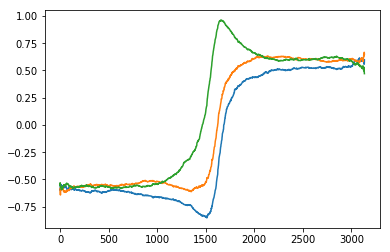

(1, 1, 64, 64)
(64, 64)


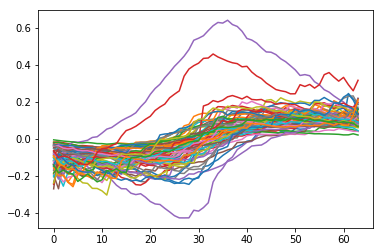

(3, 3, 64, 64)
(576, 64)


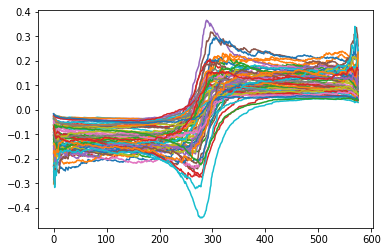

(1, 1, 64, 256)
(256, 64)


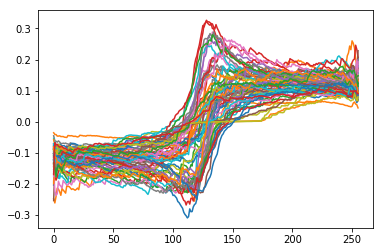

(1, 1, 64, 256)
(256, 64)


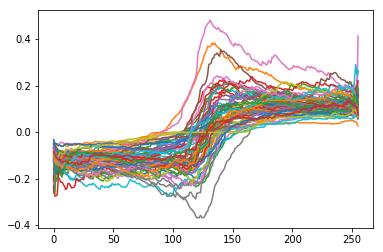

(1, 1, 256, 64)
(64, 256)


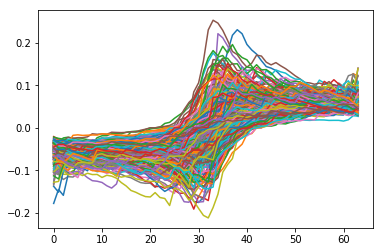

(3, 3, 64, 64)
(576, 64)


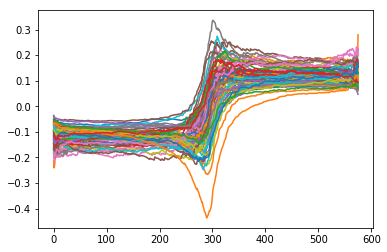

(1, 1, 64, 256)
(256, 64)


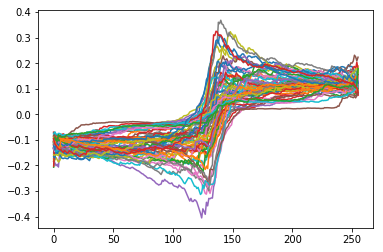

(1, 1, 256, 64)
(64, 256)


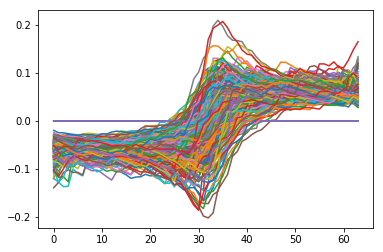

(3, 3, 64, 64)
(576, 64)


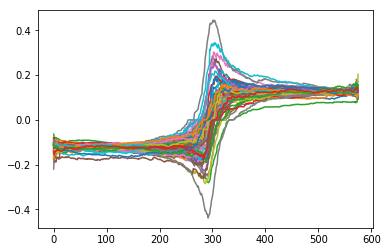

(1, 1, 64, 256)
(256, 64)


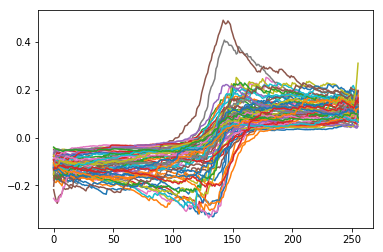

(1, 1, 256, 128)
(128, 256)


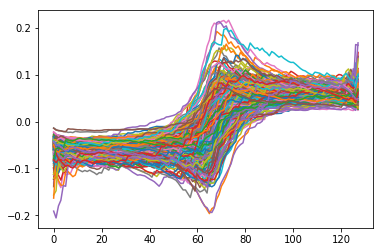

(3, 3, 128, 128)
(1152, 128)


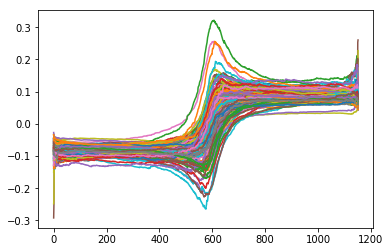

(1, 1, 128, 512)
(512, 128)


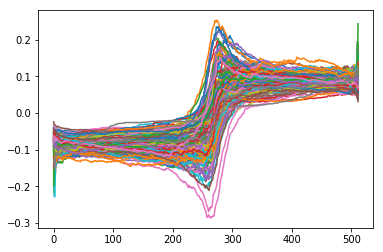

(1, 1, 256, 512)
(512, 256)


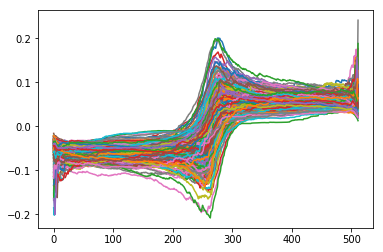

(1, 1, 512, 128)
(128, 512)


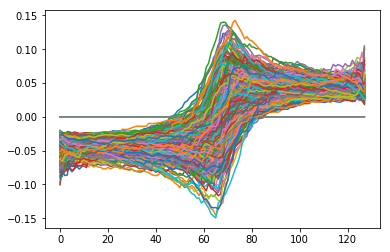

(3, 3, 128, 128)
(1152, 128)


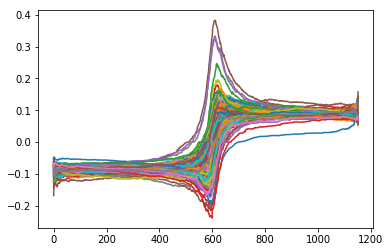

(1, 1, 128, 512)
(512, 128)


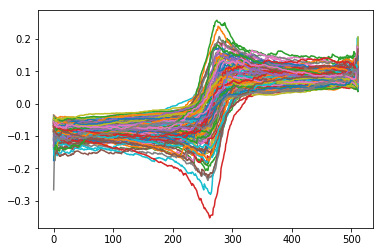

(1, 1, 512, 128)
(128, 512)


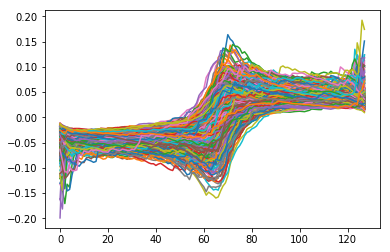

(3, 3, 128, 128)
(1152, 128)


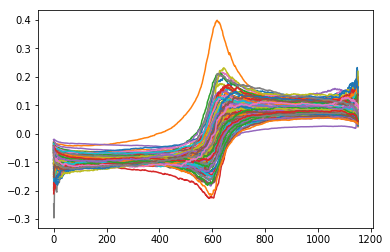

(1, 1, 128, 512)
(512, 128)


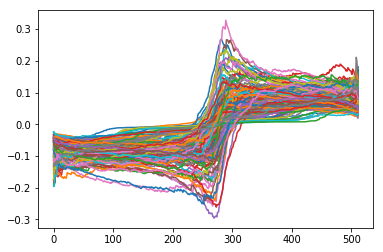

(1, 1, 512, 128)
(128, 512)


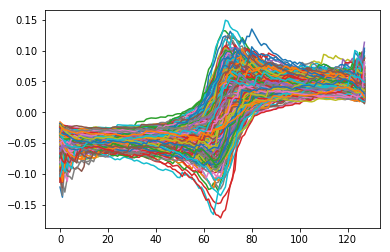

(3, 3, 128, 128)
(1152, 128)


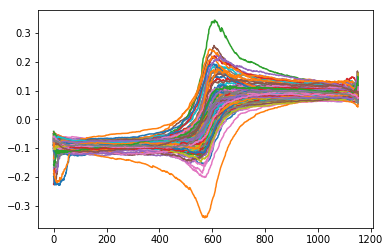

(1, 1, 128, 512)
(512, 128)


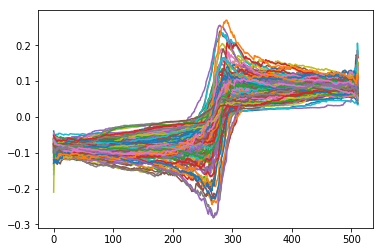

(1, 1, 512, 256)
(256, 512)


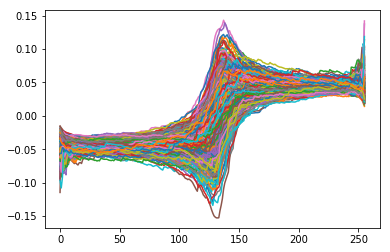

(3, 3, 256, 256)
(2304, 256)


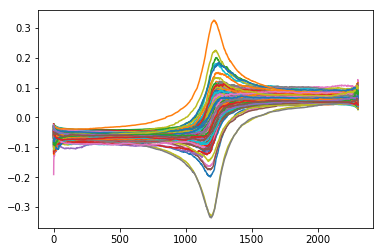

(1, 1, 256, 1024)
(1024, 256)


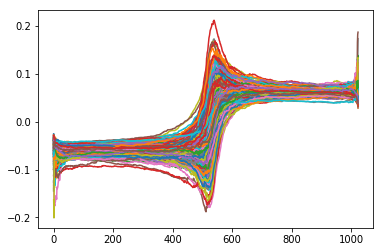

(1, 1, 512, 1024)
(1024, 512)


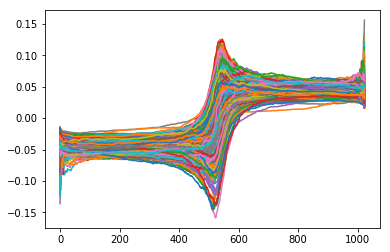

(1, 1, 1024, 256)
(256, 1024)


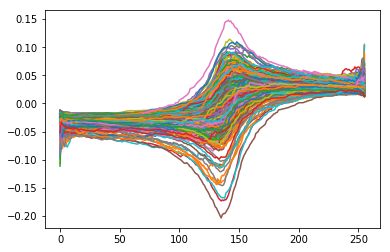

(3, 3, 256, 256)
(2304, 256)


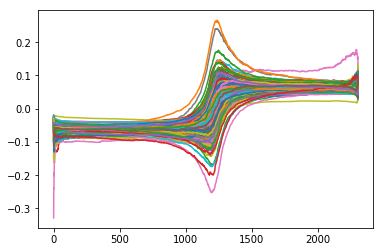

(1, 1, 256, 1024)
(1024, 256)


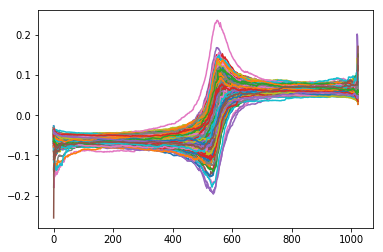

(1, 1, 1024, 256)
(256, 1024)


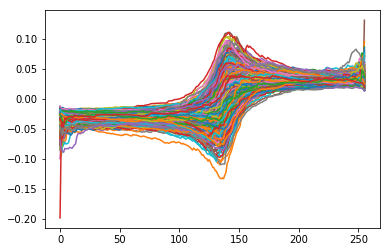

(3, 3, 256, 256)
(2304, 256)


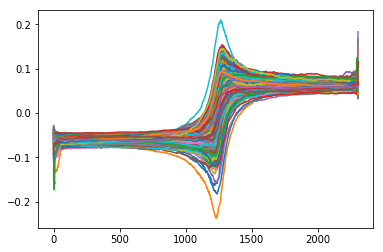

(1, 1, 256, 1024)
(1024, 256)


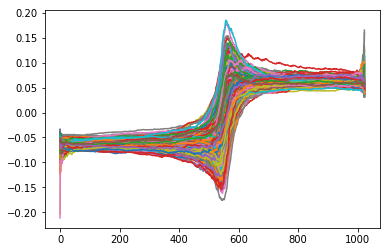

(1, 1, 1024, 256)
(256, 1024)


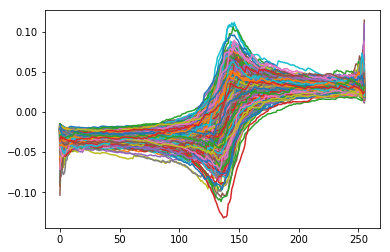

(3, 3, 256, 256)
(2304, 256)


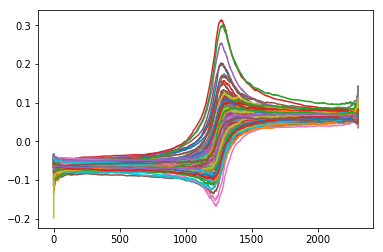

(1, 1, 256, 1024)
(1024, 256)


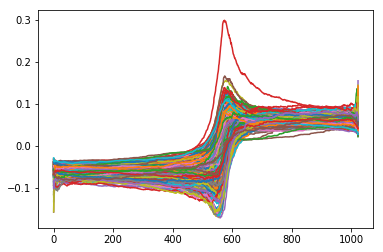

(1, 1, 1024, 256)
(256, 1024)


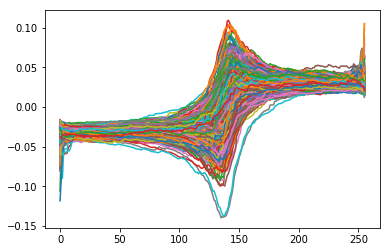

(3, 3, 256, 256)
(2304, 256)


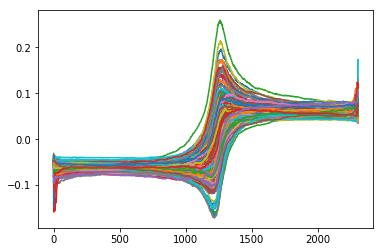

(1, 1, 256, 1024)
(1024, 256)


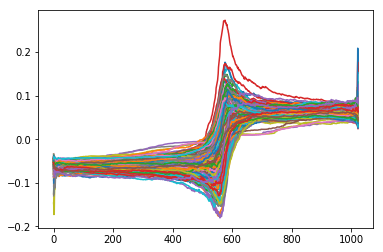

(1, 1, 1024, 256)
(256, 1024)


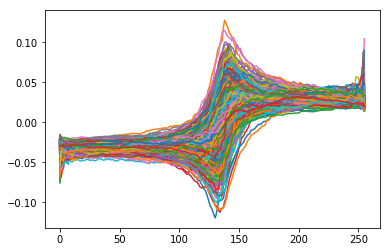

(3, 3, 256, 256)
(2304, 256)


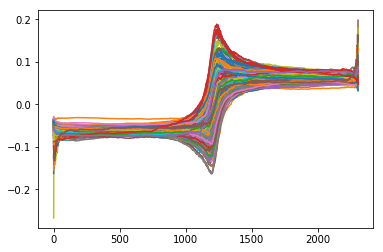

(1, 1, 256, 1024)
(1024, 256)


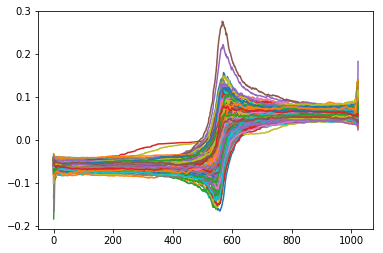

(1, 1, 1024, 512)
(512, 1024)


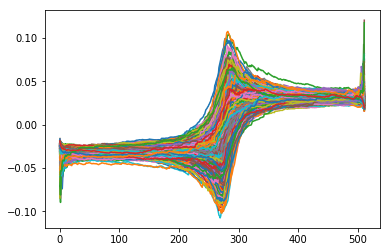

(3, 3, 512, 512)
(4608, 512)


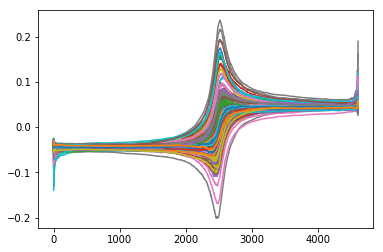

(1, 1, 512, 2048)
(2048, 512)


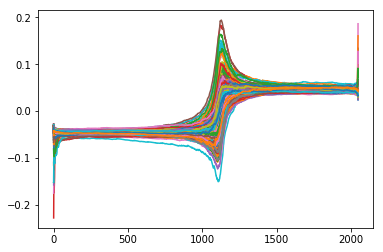

(1, 1, 1024, 2048)
(2048, 1024)


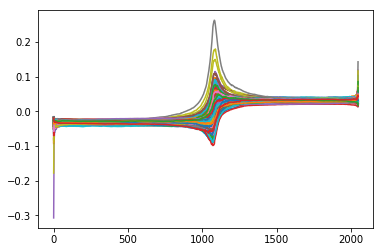

(1, 1, 2048, 512)
(512, 2048)


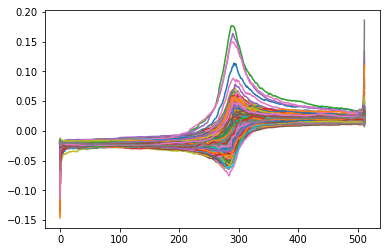

(3, 3, 512, 512)
(4608, 512)


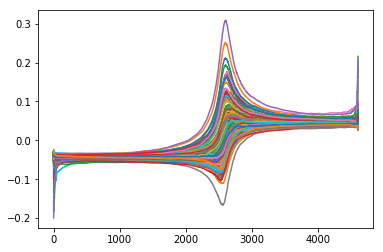

(1, 1, 512, 2048)
(2048, 512)


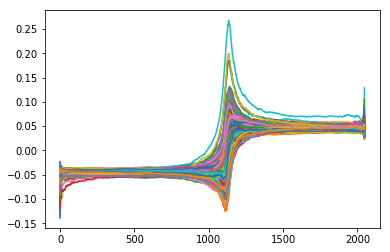

(1, 1, 2048, 512)
(512, 2048)


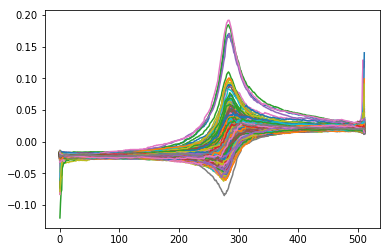

(3, 3, 512, 512)
(4608, 512)


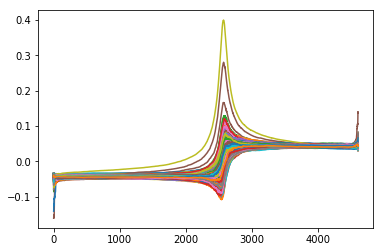

(1, 1, 512, 2048)
(2048, 512)


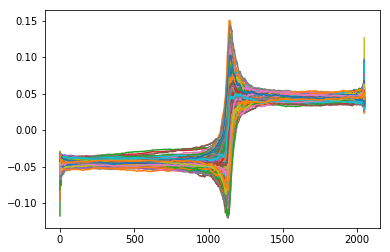

In [4]:
def proc_conv2d(model):
    clayers = filter(lambda t: isinstance(t, Conv2D), model.layers)
    for clayer in list(clayers):   # [:5]
        cweights = clayer.get_weights()
        if len(cweights) == 2: 
            cweights = cweights[0]
        proc_weights(cweights)


proc_conv2d(model)